<a href="https://colab.research.google.com/github/rashida048/Some-NLP-Projects/blob/master/Analysis_amazon_baby_products_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
tf.enable_eager_execution()

In [0]:
import pandas as pd

In [10]:
products = pd.read_csv('amazon_baby.csv')
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3.0
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5.0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5.0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5.0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0


In [0]:
gapminder['continent_group'] = gapminder.continent.apply(lambda x: 1 if x in ['Europe','America', 'Oceania'] else 0)

In [0]:
products['sentiment'] = products.rating.apply(lambda x: 0 if x in [1, 2] else 1)

In [12]:
products.head()

,name,review,rating,sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3.0,1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5.0,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5.0,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5.0,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0,1


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(oov_token='<OOV>')

In [0]:
for row in products['review']:
  row = str(row)

In [0]:
split = round(len(products)*0.75)

In [0]:
train_reviews = products['review'][:split]

In [0]:
train_label = products['sentiment'][:split]

In [0]:
test_reviews = products['review'][split:]
test_label = products['sentiment'][split:]

In [0]:
import numpy as np
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for row in train_reviews:
  training_sentences.append(str(row))
  
for row in train_label:
  training_labels.append(row) 

for row in test_reviews:
  testing_sentences.append(str(row))
  
for row in test_label:
  testing_labels.append(row) 

In [0]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 20000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [40]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? it came early and was not disappointed i love planet wise bags and now my wipe holder it keps my osocozy wipes moist and does not leak highly recommend it
it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.


In [41]:
padded[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    4,  315,  827,    5,   19,   24,  564,    3,   89,
       3764, 2595,  207,    5,   64,   12,  728, 1461,    4, 8403,   12,
       4386,  558, 5592,    5,  134,   24,  249,  223,  107,    4],
      dtype=int32)

In [42]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 320,109
Trainable params: 320,109
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 20
history = model1.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 7269 samples, validate on 2423 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
7269/7269 [==============================] - 3s 411us/sample - loss: 0.5665 - acc: 0.8002 - val_loss: 0.4658 - val_acc: 0.8205
Epoch 2/20
7269/7269 [==============================] - 2s 259us/sample - loss: 0.4775 - acc: 0.8056 - val_loss: 0.4501 - val_acc: 0.8205
Epoch 3/20
7269/7269 [==============================] - 2s 265us/sample - loss: 0.4638 - acc: 0.8056 - val_loss: 0.4392 - val_acc: 0.8205
Epoch 4/20
7269/7269 [==============================] - 2s 263us/sample - loss: 0.4450 - acc: 0.8056 - val_loss: 0.4185 - val_acc: 0.8205
Epoch 5/20
7269/7269 [==============================] - 2s 262us/sample - loss: 0.4071 - acc: 0.8084 - val_loss: 0.3809 - val_acc: 0.8296
Epoch 6/20
7269/7269 [==============================] - 2s 251us/sample - loss: 0.3448 - acc: 0.8417 - val_loss: 0.3368 - val_acc: 0.8572
Epoch 7/20
7269/7269 [========

<Figure size 432x288 with 0 Axes>

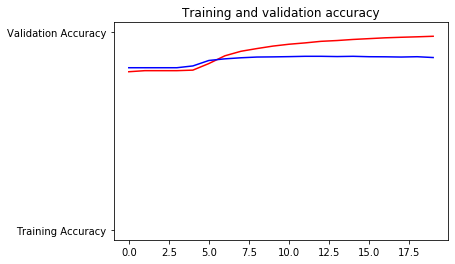

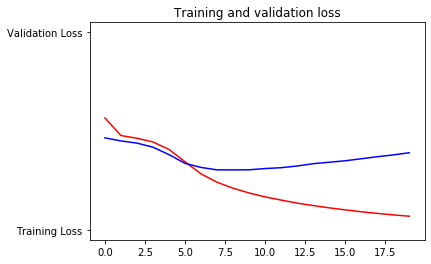

<Figure size 432x288 with 0 Axes>

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [45]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? it came early and was not disappointed i love planet wise bags and now my wipe holder it keps my osocozy wipes moist and does not leak highly recommend it
it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.


In [47]:
e = model1.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(20000, 16)
